In [5]:
%matplotlib inline

In [6]:
import numpy as np
import nibabel as nb
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
data_dir = '/home/julia/data/gradients/'
orig = np.load(data_dir + 'results/embedding/embed.npy')[:,:6]
csd = np.load(data_dir + 'results/repro/csd/csd_embed.npy')[:,:6]
ad2 = np.load(data_dir + 'results/repro/ad2/ad2_embed.npy')[:,:6]
ad3 = np.load(data_dir + 'results/repro/ad3/ad3_embed.npy')[:,:6]

In [8]:
sns.set_context('talk')
sns.set_style('white')

### AD2

In [9]:
df_ad2 = pd.DataFrame(columns=['Orig', 'AD2', 'Spearman\'s r', 'p_corr'],
                      data = np.empty((36,4)))

idx=0
for g in range(6):
    for p in range(6):
        rs = []
        surrogates = np.load(data_dir + 'results/null_models/volume/surrogates/vol{}_surrogates.npy'.format(g))
        for s in range(10000):
            r_val, _ = stats.spearmanr(surrogates[s,:], ad2[:,p])
            rs.append(r_val)
    
        r_val, _ = stats.spearmanr(orig[:,g], ad2[:,p])
        p_val = np.where(np.abs(rs)>=np.abs(r_val))[0].shape[0] / (len(rs)+1) * 36
        
        df_ad2.iloc[idx]['Orig'] = '{}'.format(g+1)
        df_ad2.iloc[idx]['AD2'] = '{}'.format(p+1)
        df_ad2.iloc[idx]['Spearman\'s r'] = r_val
        df_ad2.iloc[idx]['p_corr'] = p_val
        
        idx += 1

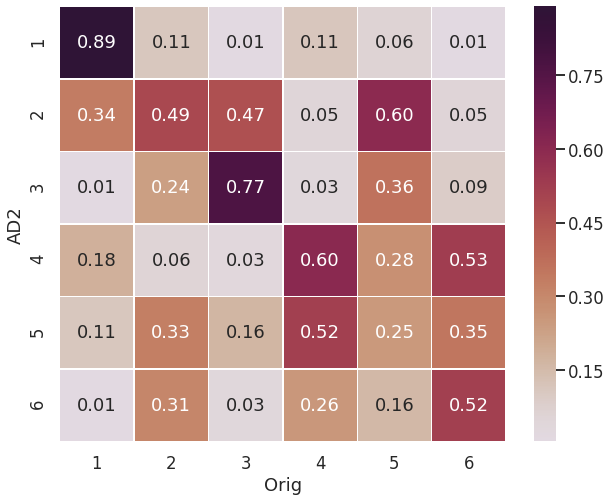

In [11]:
df_ad2_piv = df_ad2.pivot("AD2", "Orig", "Spearman\'s r")
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_ad2_piv.abs(), annot=True, fmt='.2f', cbar=True, linewidth=0.5, cmap='twilight_shifted',
            xticklabels=[1,2,3,4,5,6], yticklabels=[1,2,3,4,5,6], center=0)
plt.savefig('/home/julia/Documents/projects/mouse_gradients/repro_ad2.svg')

In [52]:
df_ad2[df_ad2['p_corr']<=0.05]

,Orig,AD2,Spearman's r,p_corr
0,1.0,1.0,-0.890003,0.000000
14,3.0,3.0,0.771459,0.000000
21,4.0,4.0,0.603943,0.010799
25,5.0,2.0,-0.598885,0.028797
33,6.0,4.0,-0.529414,0.035996


### AD3

In [55]:
df_ad3 = pd.DataFrame(columns=['Orig', 'AD3', 'Spearman\'s r', 'p_corr'],
                      data = np.empty((36,4)))

idx=0
for g in range(6):
    for p in range(6):
        rs = []
        surrogates = np.load(data_dir + 'results/null_models/volume/surrogates/vol{}_surrogates.npy'.format(g))
        for s in range(10000):
            r_val, _ = stats.spearmanr(surrogates[s,:], ad3[:,p])
            rs.append(r_val)
    
        r_val, _ = stats.spearmanr(orig[:,g], ad3[:,p])
        p_val = np.where(np.abs(rs)>=np.abs(r_val))[0].shape[0] / (len(rs)+1) * 36
        
        df_ad3.iloc[idx]['Orig'] = '{}'.format(g+1)
        df_ad3.iloc[idx]['AD3'] = '{}'.format(p+1)
        df_ad3.iloc[idx]['Spearman\'s r'] = r_val
        df_ad3.iloc[idx]['p_corr'] = p_val
        
        idx += 1

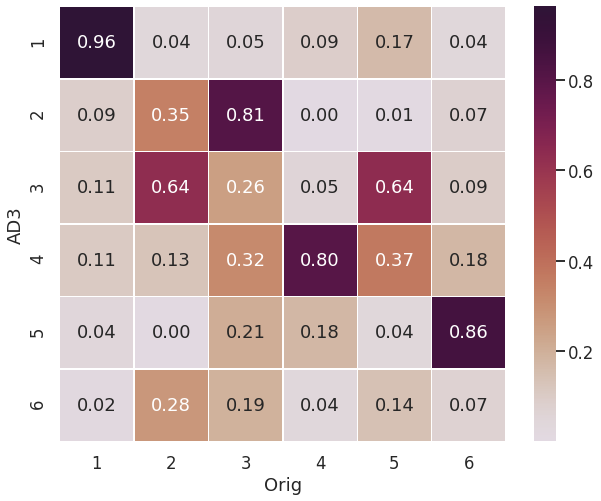

In [77]:
df_ad3_piv = df_ad3.pivot("AD3", "Orig", "Spearman\'s r")
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_ad3_piv.abs(), annot=True, fmt='.2f', cbar=True, linewidth=0.5, cmap='twilight_shifted',
            xticklabels=[1,2,3,4,5,6], yticklabels=[1,2,3,4,5,6], center=0)
plt.savefig('/home/julia/Documents/projects/mouse_gradients/repro_ad3.svg')

In [58]:
df_ad3[df_ad3['p_corr']<=0.05]

,Orig,AD3,Spearman's r,p_corr
0,1.0,1.0,-0.962696,0.0
8,2.0,3.0,0.635636,0.0
13,3.0,2.0,-0.809288,0.0
21,4.0,4.0,0.802170,0.0
26,5.0,3.0,0.637038,0.0
34,6.0,5.0,0.858538,0.0


### CSD

In [47]:
df_csd = pd.DataFrame(columns=['Orig', 'CSD', 'Spearman\'s r', 'p_corr'],
                      data = np.empty((36,4)))

idx=0
for g in range(6):
    for p in range(6):
        rs = []
        surrogates = np.load(data_dir + 'results/null_models/volume/surrogates/vol{}_surrogates.npy'.format(g))
        for s in range(10000):
            r_val, _ = stats.spearmanr(surrogates[s,:], csd[:,p])
            rs.append(r_val)
    
        r_val, _ = stats.spearmanr(orig[:,g], csd[:,p])
        p_val = np.where(np.abs(rs)>=np.abs(r_val))[0].shape[0] / (len(rs)+1) * 36
        
        df_csd.iloc[idx]['Orig'] = '{}'.format(g+1)
        df_csd.iloc[idx]['CSD'] = '{}'.format(p+1)
        df_csd.iloc[idx]['Spearman\'s r'] = r_val
        df_csd.iloc[idx]['p_corr'] = p_val
        
        idx += 1

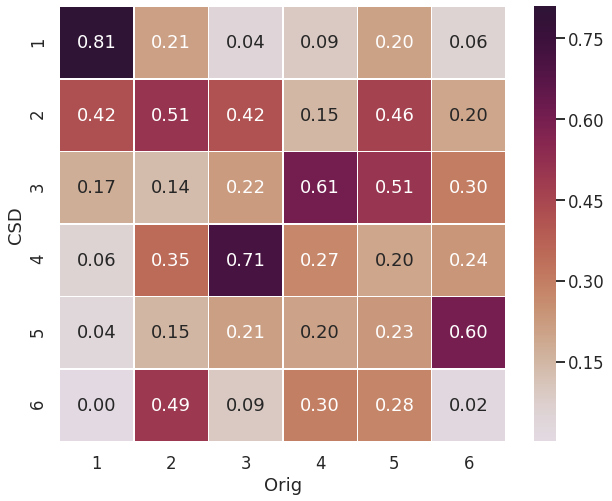

In [78]:
df_csd_piv = df_csd.pivot("CSD", "Orig", "Spearman\'s r")
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_csd_piv.abs(), annot=True, fmt='.2f', cbar=True, linewidth=0.5, cmap='twilight_shifted',
            xticklabels=[1,2,3,4,5,6], yticklabels=[1,2,3,4,5,6], center=0)
plt.savefig('/home/julia/Documents/projects/mouse_gradients/repro_csd.svg')

In [51]:
df_csd[df_csd['p_corr']<=0.05]

,Orig,CSD,Spearman's r,p_corr
0,1.0,1.0,0.808189,0.000000
11,2.0,6.0,-0.492760,0.010799
15,3.0,4.0,-0.713811,0.000000
20,4.0,3.0,-0.605694,0.000000
26,5.0,3.0,-0.505195,0.025197
34,6.0,5.0,-0.603404,0.003600
